# Prime Number Fun with the Apple Watch


## Run Durations That Last In Prime Number Minutes

To have some fun with my running, I chose duration over distance as the focus of my September 2020 runs. The duration requirements are:

1. No runs shorter than 20 minutes.
2. The duration in minutes should be close to a prime number.
3. Let my body decide the prime number.


### Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/running-stories/apple-watch-tracking"

In [5]:
runs = pd.read_csv(f"{study_path}/apple_watch_runs_summary.csv",parse_dates=['start_date'])

In [6]:
sept_runs = runs[runs['start_date'] >= '2020-09-01'].copy()

In [7]:
sept_runs["day"] = sept_runs["start_date"].dt.day

In [8]:
sept_runs.index = sept_runs["day"]

In [9]:
sept_runs["minutes"] = sept_runs["minutes"].apply(lambda x: round(x))

### Remove two exceptions

In [10]:
# The prime_minutes list accomplishes the following: 
#
# 1. Eliminates a quarter-mile "sprint". 
# 2. Eliminates a run cut short by extremely poor air quality (109 seconds below a prime number minute).
#

prime_minutes = [23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73] 

In [11]:
prime_number_runs = sept_runs[sept_runs['minutes'].isin(prime_minutes)]

### The View of September Runs

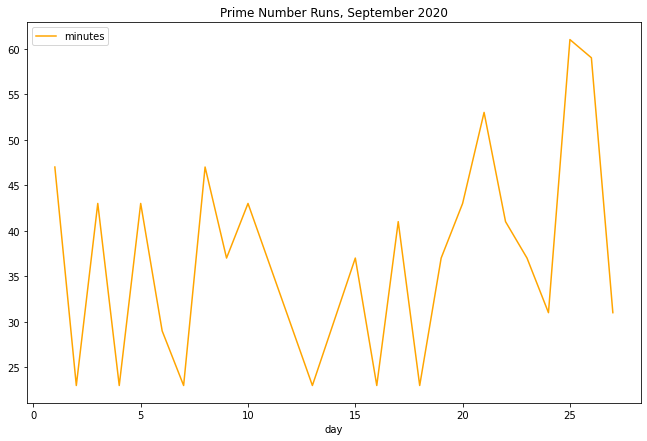

In [12]:
runs_plot = prime_number_runs.plot.line(y=['minutes'], 
                           title='Prime Number Runs, September 2020', 
                           color = 'orange',
                           figsize=(11, 7))

In [13]:
runs_plot.get_figure().savefig(f"{study_path}/sep2020_prime_lineplot")

### Frequency Distribution of Prime Number Durations

In [14]:
grouped_primes = prime_number_runs.groupby('minutes').count()

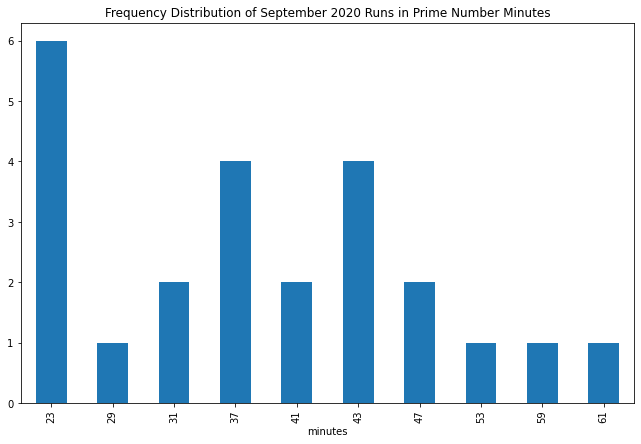

In [15]:
barplot = grouped_primes.plot.bar(y="miles", 
                                  legend=False,
                                  title = "Frequency Distribution of September 2020 Runs in Prime Number Minutes",
                                  figsize=(11, 7))

In [16]:
barplot.get_figure().savefig(f"{study_path}/sep2020_prime_frequency")

### Statistics

In [17]:
prime_number_runs.describe()["minutes"]

count    24.000000
mean     37.416667
std      11.420488
min      23.000000
25%      27.500000
50%      37.000000
75%      43.000000
max      61.000000
Name: minutes, dtype: float64